In [1]:
import pandas as pd
import time
import numpy as np
import struct
import matplotlib.pyplot as plt
from cr_data_inspection_functions import *
from lwa_antpos import mapping
from scipy.optimize import curve_fit
import scipy.stats as st
import math


dsautils.cnf not found. skipping...
Read antpos from etcd


Simulated pulses were added to the timeseries before processing through  the first cuts code.

In [7]:
summary_filename='/home/ubuntu/kp/data/2023July3-overnight-software-trigger/simulation-summary.txt'
summary_filenames=[summary_filename]

colnames=['fname',
          'config',
          'total_event_count',
          'complete_events_count',
          'incomplete_events_count',
          'scrambled_complete_events',
          'pass_rms_change_cut',
          'pass_veto_cut',
          'pass_max_distant_vs_core_cut',
          'pass_top5_distant_vs_core_cut',
          'pass_distant_vs_core_cut2',
          'total_selected_v1',
          'total_selected_v2']

all_lines=[]
for summary_filename in summary_filenames:
    with open(summary_filename) as file:
        lines = [line.rstrip().split() for line in file if line[:2]=='ov']
    all_lines+=lines
    
summary = pd.DataFrame(columns=colnames,index=range(len(all_lines)))
for j,line in enumerate(all_lines):
    for i in range(len(line)):
        if i>1: #skip the first 2
            line[i]=int(line[i])
    summary.loc[j]=line
            

0
[  0. 100. 100. 200. 200. 300. 300. 400. 400. 500. 500.]
[False  True False  True False  True False  True False  True False]
[False False  True False  True False  True False  True False  True]
1    996
3    996
5    996
7    996
9    996
Name: pass_rms_change_cut, dtype: object
2     996
4     996
6     996
8     996
10    996
Name: pass_rms_change_cut, dtype: object
2     998
4     998
6     998
8     998
10    998
Name: pass_veto_cut, dtype: object
1    998
3    998
5    998
7    998
9    998
Name: pass_veto_cut, dtype: object


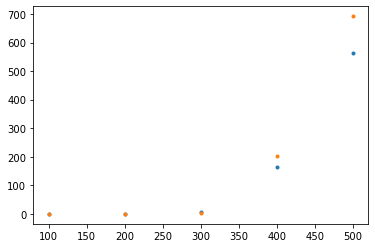

In [34]:
print(np.sum(summary['incomplete_events_count']))
Apolfiles=np.asarray([string[-5]=='A' for string in summary['config']])
Bpolfiles=np.asarray([string[-5]=='B' for string in summary['config']])
pulse=np.zeros(len(summary['config']))
pulse[1:]=np.asarray([(string[-8:-5]) for string in summary['config'][1:]])
print(pulse)
print(Apolfiles)
print(Bpolfiles)
print(summary['pass_rms_change_cut'][Apolfiles])
print(summary['pass_rms_change_cut'][Bpolfiles])
print(summary['pass_veto_cut'][Bpolfiles])
print(summary['pass_veto_cut'][Apolfiles])



Text(0.5, 1.0, 'Version 2 total cut')

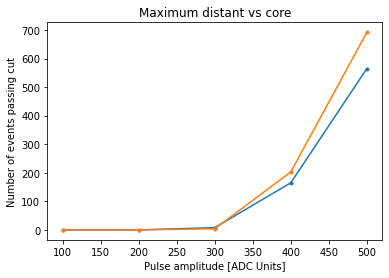

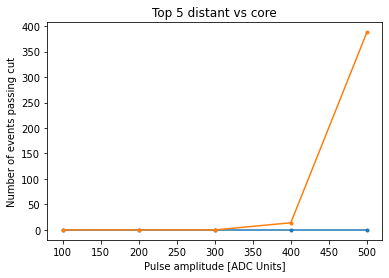

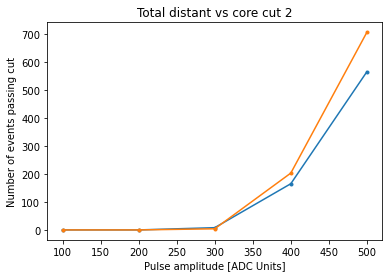

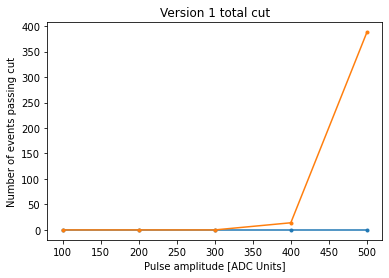

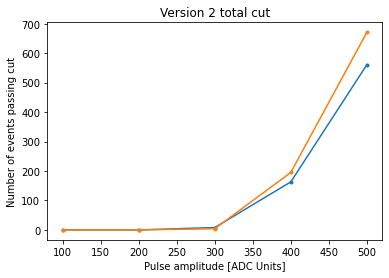

In [39]:
plt.figure()
plt.plot(pulse[Apolfiles],(summary['pass_max_distant_vs_core_cut'][Apolfiles]),'.-')
plt.plot(pulse[Bpolfiles],(summary['pass_max_distant_vs_core_cut'][Bpolfiles]),'.-')
plt.xlabel('Pulse amplitude [ADC Units]')
plt.ylabel('Number of events passing cut')
plt.title('Maximum distant vs core')

plt.figure()
plt.plot(pulse[Apolfiles],(summary['pass_top5_distant_vs_core_cut'][Apolfiles]),'.-')
plt.plot(pulse[Bpolfiles],(summary['pass_top5_distant_vs_core_cut'][Bpolfiles]),'.-')
plt.xlabel('Pulse amplitude [ADC Units]')
plt.ylabel('Number of events passing cut')
plt.title('Top 5 distant vs core')

plt.figure()
plt.plot(pulse[Apolfiles],(summary['pass_distant_vs_core_cut2'][Apolfiles]),'.-')
plt.plot(pulse[Bpolfiles],(summary['pass_distant_vs_core_cut2'][Bpolfiles]),'.-')
plt.xlabel('Pulse amplitude [ADC Units]')
plt.ylabel('Number of events passing cut')
plt.title('Total distant vs core cut 2')

plt.figure()
plt.plot(pulse[Apolfiles],(summary['total_selected_v1'][Apolfiles]),'.-')
plt.plot(pulse[Bpolfiles],(summary['total_selected_v1'][Bpolfiles]),'.-')
plt.xlabel('Pulse amplitude [ADC Units]')
plt.ylabel('Number of events passing cut')
plt.title('Version 1 total cut')


plt.figure()
plt.plot(pulse[Apolfiles],(summary['total_selected_v2'][Apolfiles]),'.-')
plt.plot(pulse[Bpolfiles],(summary['total_selected_v2'][Bpolfiles]),'.-')
plt.xlabel('Pulse amplitude [ADC Units]')
plt.ylabel('Number of events passing cut')
plt.title('Version 2 total cut')

